# Santa Clara County Census Data
By Ariel Hanasab

This is a short analysis on the Santa Clara County Census Data. Santa Clara County contains Silicon Valley, which is headquarters to some of the biggest companies of the world. This analysis will take a look at the average income in Santa Clara County in comparison to California and the rest of the United States.

## Libraries

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

## Importing the Data

In [2]:
gdf = gpd.read_file("santa_clara_census_data.geojson")

## Preliminary Inspection

In [3]:
gdf.shape

(3, 37)

In [4]:
gdf.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,01000US,United States,122802852.0,137327.0,7118907.0,42565.0,4940584.0,35307.0,4838678.0,38067.0,...,75827.0,11650162.0,61394.0,7652757.0,44359.0,8802761.0,50642.0,10422243.0,46629.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199..."
1,04000US06,California,13157873.0,23844.0,601685.0,11736.0,490306.0,11213.0,408350.0,10868.0,...,20140.0,1344893.0,20577.0,939786.0,16383.0,1241231.0,17972.0,1802741.0,18330.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."
2,05000US06085,"Santa Clara County, CA",643637.0,4477.0,15900.0,2072.0,14760.0,2097.0,11376.0,2130.0,...,3890.0,57858.0,3425.0,48078.0,3638.0,85023.0,4017.0,203393.0,5351.0,"MULTIPOLYGON (((-122.04412 37.20049, -122.0440..."


In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             3 non-null      object  
 1   name              3 non-null      object  
 2   B19001001         3 non-null      float64 
 3   B19001001, Error  3 non-null      float64 
 4   B19001002         3 non-null      float64 
 5   B19001002, Error  3 non-null      float64 
 6   B19001003         3 non-null      float64 
 7   B19001003, Error  3 non-null      float64 
 8   B19001004         3 non-null      float64 
 9   B19001004, Error  3 non-null      float64 
 10  B19001005         3 non-null      float64 
 11  B19001005, Error  3 non-null      float64 
 12  B19001006         3 non-null      float64 
 13  B19001006, Error  3 non-null      float64 
 14  B19001007         3 non-null      float64 
 15  B19001007, Error  3 non-null      float64 
 16  B19001008         3 no

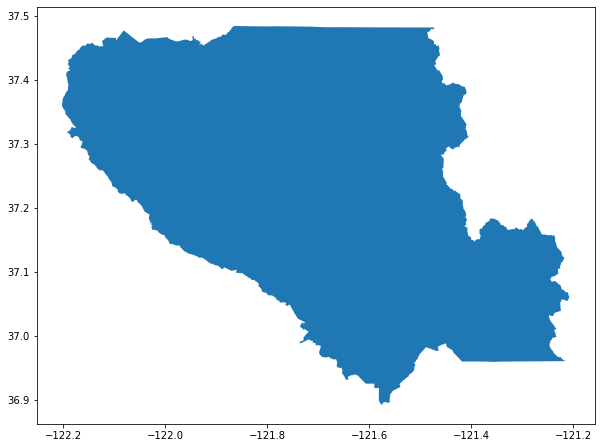

In [6]:
# Plot of Santa Clara County
gdf[gdf['name'] == 'Santa Clara County, CA'].plot(figsize = (10,10))

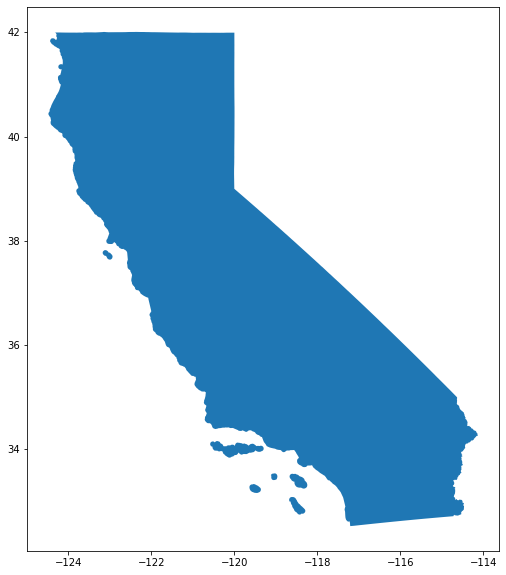

In [7]:
# Plot of California
gdf[gdf['name'] == 'California'].plot(figsize = (10,10))

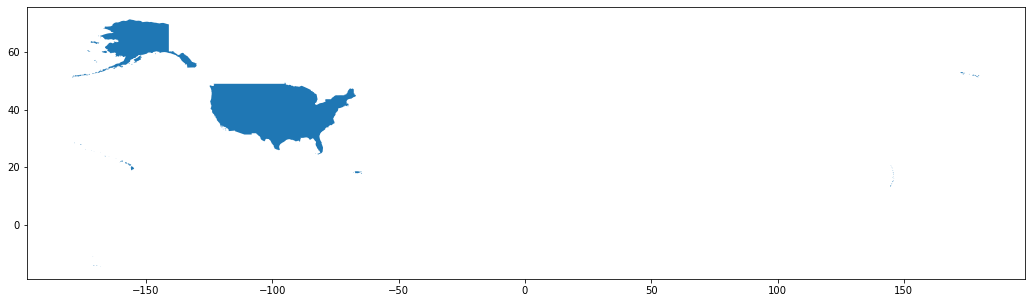

In [8]:
# Plot of the United States
gdf[gdf['name'] == 'United States'].plot(figsize = (100,5))

## Data Frame Cleaning

In [9]:
list(gdf)

['geoid',
 'name',
 'B19001001',
 'B19001001, Error',
 'B19001002',
 'B19001002, Error',
 'B19001003',
 'B19001003, Error',
 'B19001004',
 'B19001004, Error',
 'B19001005',
 'B19001005, Error',
 'B19001006',
 'B19001006, Error',
 'B19001007',
 'B19001007, Error',
 'B19001008',
 'B19001008, Error',
 'B19001009',
 'B19001009, Error',
 'B19001010',
 'B19001010, Error',
 'B19001011',
 'B19001011, Error',
 'B19001012',
 'B19001012, Error',
 'B19001013',
 'B19001013, Error',
 'B19001014',
 'B19001014, Error',
 'B19001015',
 'B19001015, Error',
 'B19001016',
 'B19001016, Error',
 'B19001017',
 'B19001017, Error',
 'geometry']

In [10]:
columns_to_keep = ['name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [11]:
# redefine gdf with only columns to keep
gdf = gdf[columns_to_keep]

In [12]:
# verify the changes
gdf.head()

,name,B19001001,B19001002,B19001003,B19001004,B19001005,B19001006,B19001007,B19001008,B19001009,B19001010,B19001011,B19001012,B19001013,B19001014,B19001015,B19001016,B19001017,geometry
0,United States,122802852.0,7118907.0,4940584.0,4838678.0,5322157.0,4984288.0,5320934.0,4933391.0,5114120.0,4620661.0,9080796.0,12247929.0,15752484.0,11650162.0,7652757.0,8802761.0,10422243.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199..."
1,California,13157873.0,601685.0,490306.0,408350.0,462991.0,433367.0,464508.0,441513.0,451639.0,413466.0,832613.0,1183466.0,1645318.0,1344893.0,939786.0,1241231.0,1802741.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."
2,"Santa Clara County, CA",643637.0,15900.0,14760.0,11376.0,11703.0,12610.0,14817.0,13584.0,11966.0,12298.0,26984.0,42792.0,60495.0,57858.0,48078.0,85023.0,203393.0,"MULTIPOLYGON (((-122.04412 37.20049, -122.0440..."


In [13]:
# column names
column_names = ['name',
 'Total Population',
 'Less than $10,000',
 '\$10,000 to $14,999',
 '\$15,000 to $19,999',
 '\$20,000 to $24,999',
 '\$25,000 to $29,999',
 '\$30,000 to $34,999',
 '\$35,000 to $39,999',
 '\$40,000 to $44,999',
 '\$45,000 to $49,999',
 '\$50,000 to $59,999',
 '\$60,000 to $74,999',
 '\$75,000 to $99,999',
 '\$100,000 to $124,999',
 '\$125,000 to $149,999',
 '\$150,000 to $199,999',
 '\$200,000 or more',
 'geometry']

In [14]:
# rename columns
gdf.columns = column_names

In [15]:
# verify changes
gdf.head()

,name,Total Population,"Less than $10,000","\$10,000 to $14,999","\$15,000 to $19,999","\$20,000 to $24,999","\$25,000 to $29,999","\$30,000 to $34,999","\$35,000 to $39,999","\$40,000 to $44,999","\$45,000 to $49,999","\$50,000 to $59,999","\$60,000 to $74,999","\$75,000 to $99,999","\$100,000 to $124,999","\$125,000 to $149,999","\$150,000 to $199,999","\$200,000 or more",geometry
0,United States,122802852.0,7118907.0,4940584.0,4838678.0,5322157.0,4984288.0,5320934.0,4933391.0,5114120.0,4620661.0,9080796.0,12247929.0,15752484.0,11650162.0,7652757.0,8802761.0,10422243.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199..."
1,California,13157873.0,601685.0,490306.0,408350.0,462991.0,433367.0,464508.0,441513.0,451639.0,413466.0,832613.0,1183466.0,1645318.0,1344893.0,939786.0,1241231.0,1802741.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."
2,"Santa Clara County, CA",643637.0,15900.0,14760.0,11376.0,11703.0,12610.0,14817.0,13584.0,11966.0,12298.0,26984.0,42792.0,60495.0,57858.0,48078.0,85023.0,203393.0,"MULTIPOLYGON (((-122.04412 37.20049, -122.0440..."


In [16]:
# check for missing values
gdf.isna().any()

name                     False
Total Population         False
Less than $10,000        False
\$10,000 to $14,999      False
\$15,000 to $19,999      False
\$20,000 to $24,999      False
\$25,000 to $29,999      False
\$30,000 to $34,999      False
\$35,000 to $39,999      False
\$40,000 to $44,999      False
\$45,000 to $49,999      False
\$50,000 to $59,999      False
\$60,000 to $74,999      False
\$75,000 to $99,999      False
\$100,000 to $124,999    False
\$125,000 to $149,999    False
\$150,000 to $199,999    False
\$200,000 or more        False
geometry                 False
dtype: bool

## Bar Plots of Income

In [17]:
income_columns = [
 'Less than $10,000',
 '\$10,000 to $14,999',
 '\$15,000 to $19,999',
 '\$20,000 to $24,999',
 '\$25,000 to $29,999',
 '\$30,000 to $34,999',
 '\$35,000 to $39,999',
 '\$40,000 to $44,999',
 '\$45,000 to $49,999',
 '\$50,000 to $59,999',
 '\$60,000 to $74,999',
 '\$75,000 to $99,999',
 '\$100,000 to $124,999',
 '\$125,000 to $149,999',
 '\$150,000 to $199,999',
 '\$200,000 or more'
]

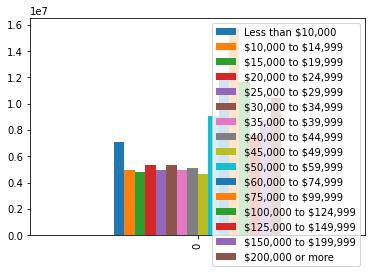

In [18]:
# Bar plot of the United States Income
gdf[gdf["name"] == "United States"][income_columns].plot.bar()

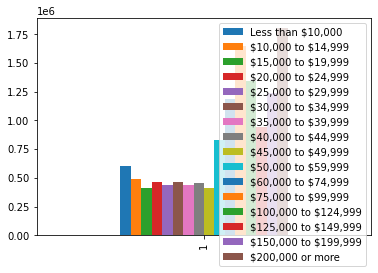

In [19]:
# Bar plot of California Income
gdf[gdf["name"] == "California"][income_columns].plot.bar()

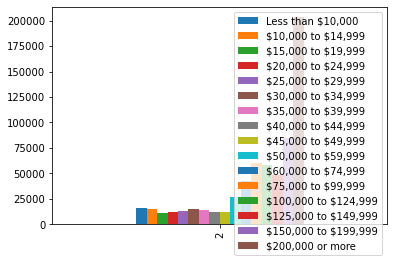

In [20]:
# Bar plot of Santa Clara County Income
gdf[gdf["name"] == "Santa Clara County, CA"][income_columns].plot.bar()

In [50]:
# Normalize United States Income
US_income_norm = gdf[gdf["name"] == "United States"][income_columns] / gdf[gdf["name"] == "United States"]["Total Population"][0]
# Verify sum is 1
US_income_norm.sum(axis=1)

0    1.0
dtype: float64

In [51]:
# Normalize California Income
CA_income_norm = gdf[gdf["name"] == "California"][income_columns] / gdf[gdf["name"] == "California"]["Total Population"][1]
# Verify sum is 1
CA_income_norm.sum(axis=1)

1    1.0
dtype: float64

In [52]:
# Normalize Santa Clara County Income
SCC_income_norm = gdf[gdf["name"] == "Santa Clara County, CA"][income_columns] / gdf[gdf["name"] == "Santa Clara County, CA"]["Total Population"][2]
# Verify sum is 1
SCC_income_norm.sum(axis=1)

2    1.0
dtype: float64

In [80]:
# Merge Normalized Income into one Data Frame
gdf_income_norm = pd.concat([US_income_norm, CA_income_norm, SCC_income_norm])
gdf_income_norm.rename({0:"United States", 1:"California", 2:"Santa Clara County, CA"}, inplace = True)
gdf_income_norm

,"Less than $10,000","\$10,000 to $14,999","\$15,000 to $19,999","\$20,000 to $24,999","\$25,000 to $29,999","\$30,000 to $34,999","\$35,000 to $39,999","\$40,000 to $44,999","\$45,000 to $49,999","\$50,000 to $59,999","\$60,000 to $74,999","\$75,000 to $99,999","\$100,000 to $124,999","\$125,000 to $149,999","\$150,000 to $199,999","\$200,000 or more"
United States,0.057970,0.040232,0.039402,0.043339,0.040588,0.043329,0.040173,0.041645,0.037627,0.073946,0.099737,0.128275,0.094869,0.062317,0.071682,0.084870
California,0.045728,0.037263,0.031035,0.035187,0.032936,0.035303,0.033555,0.034325,0.031423,0.063279,0.089944,0.125044,0.102212,0.071424,0.094334,0.137009
"Santa Clara County, CA",0.024703,0.022932,0.017675,0.018183,0.019592,0.023021,0.021105,0.018591,0.019107,0.041924,0.066485,0.093989,0.089892,0.074697,0.132098,0.316006


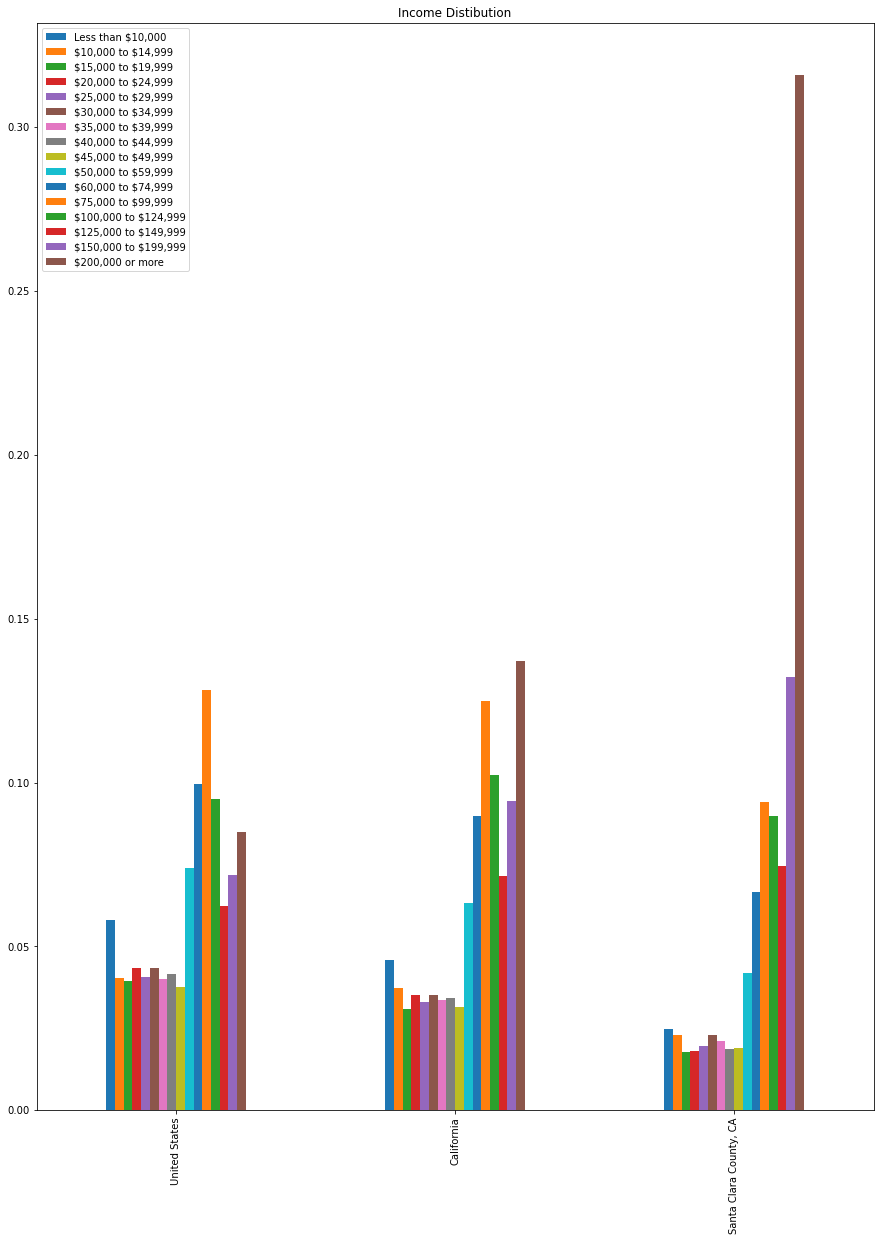

In [92]:
# Side by Side comparison of Income between United States, CA, and Santa Clara County
gdf_income_norm.plot.bar(figsize = (15, 20), title = "Income Distibution")